# Neuron models
Neuron models are featured heavily in machine learning as a way to convert data signals into some quantitative output. Neuron models are an algorithmic representation of biological neuron cells like those found in the human brain. Biological neurons are composed of dendrites, a cell body, and an axon. Chemical signals are received by the dendrites, creating an electrical potential in the neuron. If the electrical potential exceeds the threshold of a certain activation potential, then an electrical impulse is sent through the axon, which releases chemical signals to other neurons.

Algorithm neuron models behave analogously. Instead of a chemical signal, a data signal--typically a vector--is received by the neuron. If the data signal produces a strong enough preactivation value, then the neuron produces an output value to the next neurons.

## Single-neuron models
The simplest neural network model is the single-neuron model. A neuron is defined by a set of "preactivation weights" $w \in \mathbb{R}^m$, a "bias" $b \in \mathbb{R}$, and an "activation function" $\phi: \mathbb{R}^{m+1} \rightarrow \mathbb{R}$. The model accepts a signal vector $x \in \mathbb{R}^m$. The preactivation function $w \cdot x + b$ is computed. Then, the postactivation value $\hat y = \phi(w \cdot x + b)$ is output by the neuron.

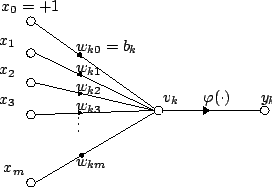
Image from [Wikipedia](https://en.wikipedia.org/wiki/File:Artificial_neuron.png).

The neuron may be trained using an update method, which changes the neuron weights $w$ such that the neuron outputs become more optimal. There are many ways to update the weights and many ways to measure the optimality of neuron outputs. Our below (abstract) implementation of a single-neuron model chooses to train the neuron using the following scheme:

1. Initialize $w \in \mathbb{R}^m, b \in \mathbb{R}$. These can be initialized randomly; we have chosen to initialize to all 0s.
2. Repeat for a given number of epochs: Foreach data point $i$ composed of input signal $x_i \in \mathbb{R}^m$ and observation $y_i \in \mathbb{R}$:
    1. Make model prediction $\hat y_i = \phi(w \cdot x_i + b)$.
    2. Update the weights $w, b$ using the input signal $x_i$, observation $y_i$, and prediction $\hat y_i$.

We have left the update method and the activation function as abstracted methods, as these methods will vary depending on neuron implementation and application.

In [1]:
import numpy as np
from abc import ABC, abstractmethod
from tqdm import tqdm

class SingleNeuron(ABC):
    '''
    Abstract class for a single artificial neuron.
    
    ATTRIBUTES
        weights    (m, 1)-shape array of weights in the preactivation function
        bias       (1, 1)-shape array representing the model bias in the preactivation function
    
    METHODS
        predict         Computes the neuron postactivation output from given input signal
        train           Trains the neuron from given input signals and observations for a given number of epochs
        activation      Abstract. Computes the postactivation value from the given the preactivation value
        update          Abstract. Updates the neuron preactivation weights from the given data observation and neuron prediction
        cost_function   Abstract. Computes the cost function from the given data observation and neuron prediction
    '''
    weights = None    # weights for preactivation function. 1-dimenional column array.
    bias = None
        
    def predict(self, signal):
        '''
        Makes neuron prediction based on input signal (fires neuron).
        Computes preactivation value using weights and input signal.
        Then returns postactivation value by applying activation function to the preactivation value.
        INPUT
            signal; (n, m)-shape array of data signals. Each column represents a model feature (associated with weights). Each each row is a data point.
        RETURNS
            (n, 1)-shape vector of predictions, where each component is the prediction for a row from the input signal.
        '''
        preactivation = np.matmul(signal, self.weights) + self.bias
        return self.activation(preactivation)

    
    def train(self, X_train, y_train, n_epoch):
        '''
        Trains the neuron for n_epoch epochs on training signals X_train and training observations y_train.
        INPUT
            X_train; (n, m)-shape array of data signals. Each column represents a model feature (associated with weights). Each each row is a data point.
            y_train; (n, 1)-shape vector of data observations. Each component represents a separate data point. Parallel to X_train.
            n_epoch; positive integer number of epochs to train
        RETURNS
            (n_epoch, )-shape vector, where each component i is the total cost function from epoch i 
        '''
        # Get size of data input
        n_sample, n_features = X_train.shape
        
        # Initialize weights and bias to 0s if they are not already initialized
        if self.weights is None:
            self.weights = np.zeros((n_features, 1))
        if self.bias is None:
            self.bias = 0
            
        # Create array to store each epoch's cost function
        epoch_cost = np.zeros((n_epoch, ))
        
        # Train model by predicting each data point's observation based on the data point's input signal.
        # Update the weights after each data point's prediction.
        prog = tqdm(range(n_epoch)) # Progress bar
        for epc in prog:
            for ind in range(n_sample):
                signal = X_train[ind, :].reshape((1, n_features))
                predicted = self.predict(signal)[0]
                actual = y_train[ind, 0]
                self.update(actual, predicted, signal)
                epoch_cost[epc] += self.cost_function(actual, predicted, signal)
            prog.set_description("Cost: " + str(round(epoch_cost[epc], 5)))
            prog.update()
        return epoch_cost
    

    @abstractmethod
    def activation(self, preactivation):
        '''
        Given preactivation value(s), returns the postactivation value(s).
        INPUT
            preactivation; (n, 1)-shape vector, where component i is the preactivation value for some input signal i
        RETURNS
            (n, 1)-shape vector, where component i is the postactivation value for some input signal i
        '''
        pass
    
    @abstractmethod
    def update(self, actual, predicted, signal):
        '''
        Updates the neuron weights and bias.
        INPUT
            actual; scalar actual data observation y_i
            predicted; scalar predicted observation yhat_i
            signal; (1, m)-shape array of the data input signal x_i
        '''
        pass
        
    @abstractmethod
    def cost_function(self, actual, predicted, signal):
        '''
        Computes cost function for the given prediction.
        INPUT
            actual; scalar actual data observation y_i
            predicted; scalar predicted observation yhat_i
            signal; (1, m)-shape array of the data input signal x_i
        '''
        pass    
    